# CODIGO DE APLICACIÓN A UN DATASET DE OTRO PERIODO

Todo el trabajo que se ha hecho durante el proyecto se ha hecho sobre el periodo de diciembre de 2024 y ahora lo que voy a hacer es ejecutar el código contra los datos de Airbnb de marzo de 2025 para ver si extrae los resultados

*NOTA: Para poder usar este código de ejecución hay que lanzarlo desde exactamente el mismo entorno en el que fue realizado el proyecto.*

*Se puede instalar ese entorno en la nueva máquina usando el environment.yml que creamos en el set up del proyecto*

*Copiar el 007_airbnb.yml que tenemos en la carpeta Documentos, al directorio y en el terminal o anaconda prompt ejecutar:*

conda env create --file 007_airbnb.yml --name 007_airbnb

In [1]:
#Importamos los paquetes necesarios
import cloudpickle
import pandas as pd
import sqlalchemy as sa
from janitor import clean_names


# PRECIO_M2 IDEALISTA
#Ruta del proyecto
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB'

#Nombre del fichero de datos
nombre_fichero_datos = 'precios_idealista_Dic24.csv'

#Cargar los datos
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/' + nombre_fichero_datos
precio_m2 = pd.read_csv(ruta_completa)

#Pipeline con las modificaciones hechas en la tabla
nombre_pipe = 'pipe_idealista.pickle'
ruta_pipe = ruta_proyecto + '/04_Modelos/' + nombre_pipe
with open(ruta_pipe, mode='rb') as file:
    pipe_idealista = cloudpickle.load(file)

precio_m2 = pipe_idealista.transform(precio_m2)


# LISTINGS AIRBNB
#Ruta del proyecto
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB'

#Nombre del fichero de datos
nombre_fichero_datos = 'listings.csv'

#Cargar los datos
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/Airbnb_Mar25/' + nombre_fichero_datos
listings = pd.read_csv(ruta_completa)

'''con = sa.create_engine('sqlite:///C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB/02_Datos/01_Originales/airbnb2025.db')

#Nombre del fichero de datos
nombre_fichero_datos = 'airbnb2025.db'

#Cargar los datos
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/' + nombre_fichero_datos
listings = pd.read_sql('listings', con).drop(columns='index')#.set_index('id')'''



# LISTINGS_DET AIRBNB
#Ruta del proyecto
ruta_proyecto = 'C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB'

#Nombre del fichero de datos
nombre_fichero_datos = 'listings_det.csv'

#Cargar los datos
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/Airbnb_Mar25/' + nombre_fichero_datos
listings_det = pd.read_csv(ruta_completa)

'''con = sa.create_engine('sqlite:///C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB/02_Datos/01_Originales/airbnb2025.db')

#Nombre del fichero de datos
nombre_fichero_datos = 'airbnb2025.db'

#Cargar los datos
ruta_completa = ruta_proyecto + '/02_Datos/01_Originales/' + nombre_fichero_datos
listings_det = pd.read_sql('listings_det', con).drop(columns='index')#.set_index('id')'''


#Pipeline con las modificaciones hechas en la tabla
nombre_pipe = 'pipe_preparacion_df.pickle'
ruta_pipe = ruta_proyecto + '/04_Modelos/' + nombre_pipe
with open(ruta_pipe, mode='rb') as file:
    pipe_preparacion_df = cloudpickle.load(file)

df = pipe_preparacion_df.transform((listings_det, listings, precio_m2))

#Pipeline con las modificaciones hechas en la tabla
nombre_pipe = 'pipe_calidad_datos.pickle'
ruta_pipe = ruta_proyecto + '/04_Modelos/' + nombre_pipe
with open(ruta_pipe, mode='rb') as file:
    pipe_calidad_datos = cloudpickle.load(file)
    
df = pipe_calidad_datos.transform(df)

#Pipeline con las modificaciones hechas en la tabla
nombre_pipe = 'pipe_gestion_variables.pickle'
ruta_pipe = ruta_proyecto + '/04_Modelos/' + nombre_pipe
with open(ruta_pipe, mode='rb') as file:
    pipe_gestion_variables = cloudpickle.load(file)

df = pipe_gestion_variables.transform(df)

con = sa.create_engine('sqlite:///C:/Users/Oscar/OneDrive - FM4/Escritorio/Python Data Mastery/EstructuraDirectorio/03_MACHINE_LEARNING/08_CASOS/007_AIRBNB/02_Datos/01_Originales/airbnb2025.db')

extras_df = df[['id', 'precio_total', 'm2', 'precio_m2']].copy()
extras_df.to_sql('extras_df', con = con, if_exists = 'replace')

variables_finales = [
'accommodates',
'availability_30',
'availability_365',
'availability_90',
'bedrooms',
'bed',
'calculated_host_listings_count',
'has_availability',
'host_response_rate',
'host_response_time',
'instant_bookable',
'maximum_nights',
'neighbourhood_group',
'price',
'property_type',
'room_type',
'license',
'bathrooms',
'air',
'allowed',
'cleaning',
'hot water iron',
'iron',
'microwave',
'parking',
'refrigerator',
'shampoo',
'tv washer',
'wifi kitchen',
'neighbourhood_cleansed',
'and silverware',
'body',
'clothing',
'clothing storage',
'coffee',
'elevator',
'hair',
'host_identity_verified',
'host_verifications',
'kitchen essentials',
'allowed',
'basics',
'beds',
'dryer bed',
'hair dryer',
'maker',
'microwave hangers',
'oven',
'stove',
'review_scores_rating',
'review_scores_accuracy',
'review_scores_cleanliness',
'review_scores_checkin',
'review_scores_communication',
'review_scores_location',
'review_scores_value',
'host_is_superhost',
'bathrooms_text',
'precio_m2',
'latitude',
'longitude',
'amenities',
'number_of_reviews']

df = df[variables_finales]

nombre_pipe_ejecucion = 'pipe_ejecucion.pickle'
ruta_pipe_ejecucion = ruta_proyecto + '/04_Modelos/' + nombre_pipe_ejecucion
with open(ruta_pipe_ejecucion, mode='rb') as file:
   pipe_ejecucion = cloudpickle.load(file)

scoring = pipe_ejecucion.predict_proba(df)[:, 1]

df['rentabilidad_predicha'] = scoring
df['rentable'] = df['rentabilidad_predicha'] > 0.5
df['id'] = extras_df['id']
df['precio_total'] = extras_df['precio_total']
df['m2'] = extras_df['m2']

# Rentabilidad del inmueble
ocupacion_media = 0.60  # 60% de ocupación anual
coste_operativo_pct = 0.30  # 30% de los ingresos
df['ingresos_brutos_anuales'] = df['precio_total'] * df['availability_365'] * ocupacion_media
df['beneficio_neto_anual'] = round(df['ingresos_brutos_anuales'] * (1 - coste_operativo_pct),2)

# Estimar el precio de mercado de la vivienda
df['precio_estimado'] = df['precio_m2'] * df['m2']

# Rentabilidad anual en %
df['rentabilidad_anual_pct'] = round((df['beneficio_neto_anual'] / df['precio_estimado']) * 100,2)

df.set_index('id', inplace = True)

In [2]:
df.isna().sum().sort_values(ascending=False)

host_identity_verified       9
host_verifications           9
maker                        0
review_scores_cleanliness    0
review_scores_accuracy       0
                            ..
microwave                    0
iron                         0
hot water iron               0
cleaning                     0
rentabilidad_anual_pct       0
Length: 71, dtype: int64

In [3]:
#Mostrar el máximo de columnas posibles de una tabla
pd.set_option('display.max_columns', None) #Número de columnas que deben verse. None = Máx
df[['neighbourhood_group','room_type','review_scores_value','price','precio_estimado','beneficio_neto_anual','rentabilidad_anual_pct']].loc[(df.beneficio_neto_anual>0)]

,neighbourhood_group,room_type,review_scores_value,price,precio_estimado,beneficio_neto_anual,rentabilidad_anual_pct
id,,,,,,,
21853,Latina,Private room,4.67,29.0,138600,2837.94,2.05
62423,Centro,Private room,4.58,77.0,308500,13133.04,4.26
70059,Centro,Entire home/apt,4.53,66.0,308500,1496.88,0.49
70310,Centro,Entire home/apt,4.11,89.0,308500,10802.82,3.50
72150,Centro,Entire home/apt,4.47,173.0,555300,11843.58,2.13
...,...,...,...,...,...,...,...
1368966803909544118,Hortaleza,Entire home/apt,0.00,66.0,218400,10117.80,4.63
1368974630547284843,Tetuán,Entire home/apt,0.00,67.0,226800,9989.70,4.40
1368981094706864086,Tetuán,Entire home/apt,0.00,63.0,226800,9525.60,4.20


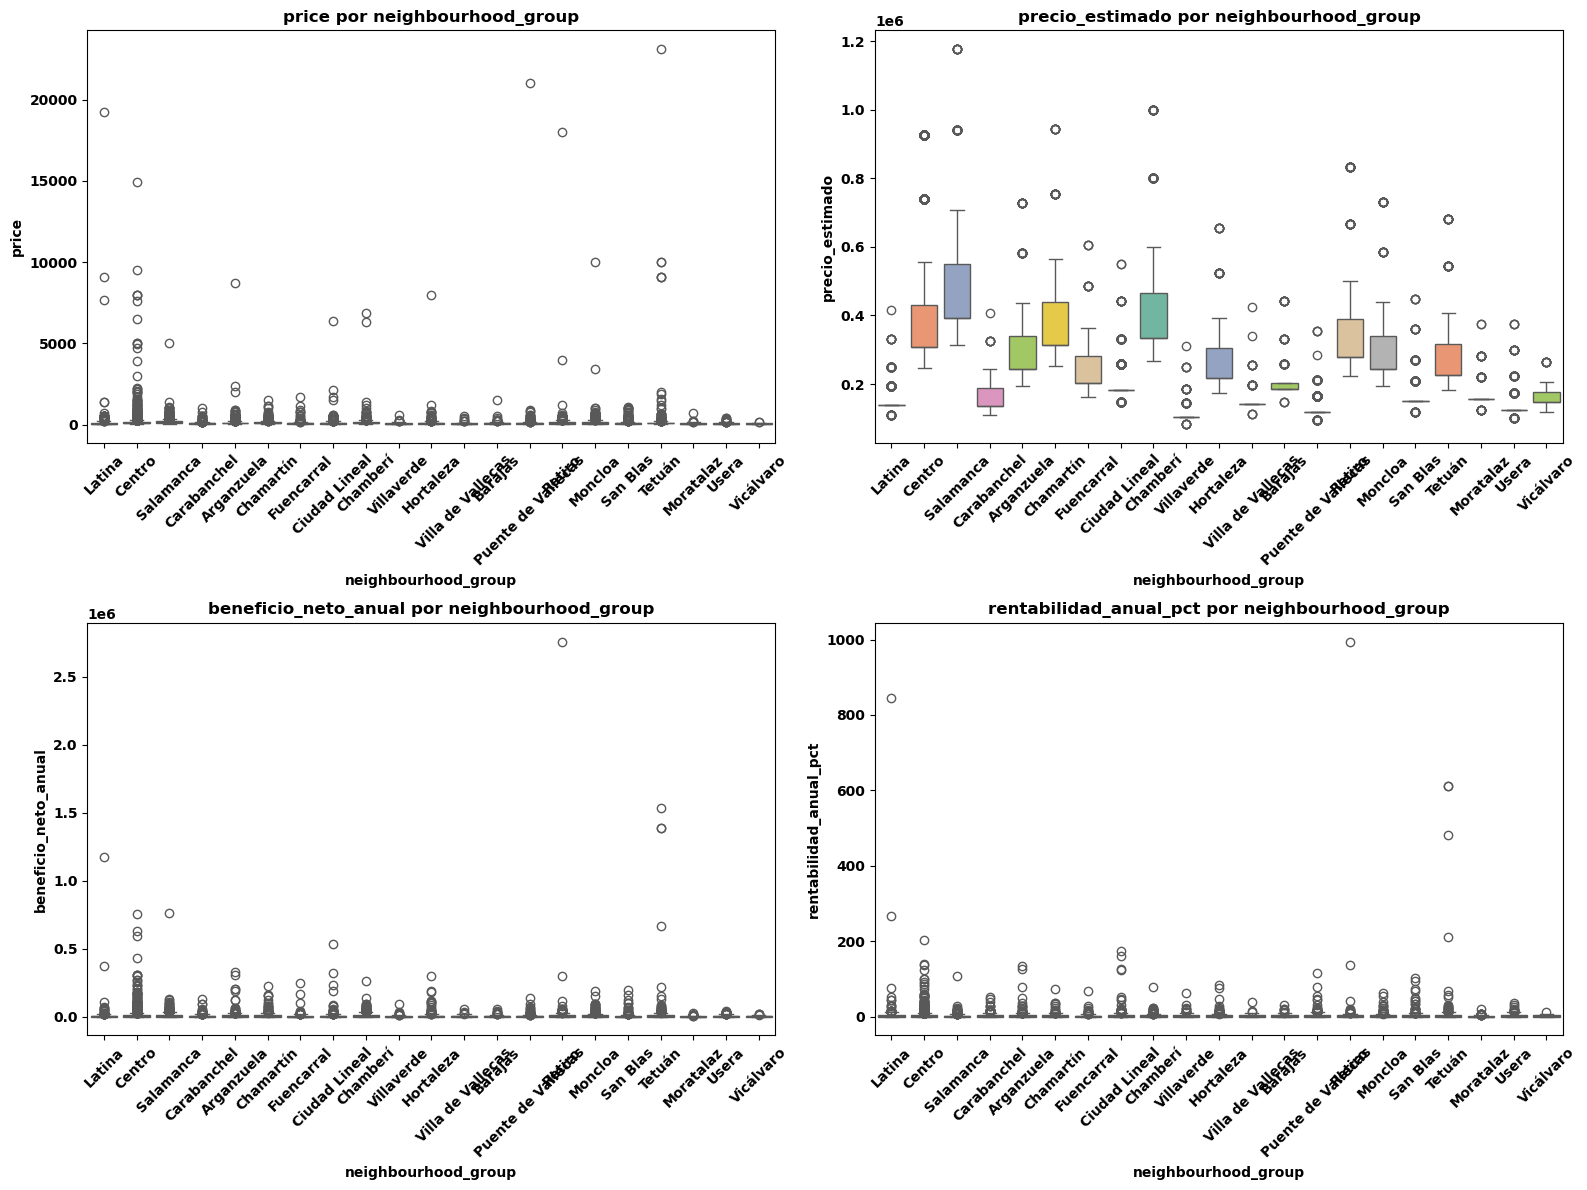

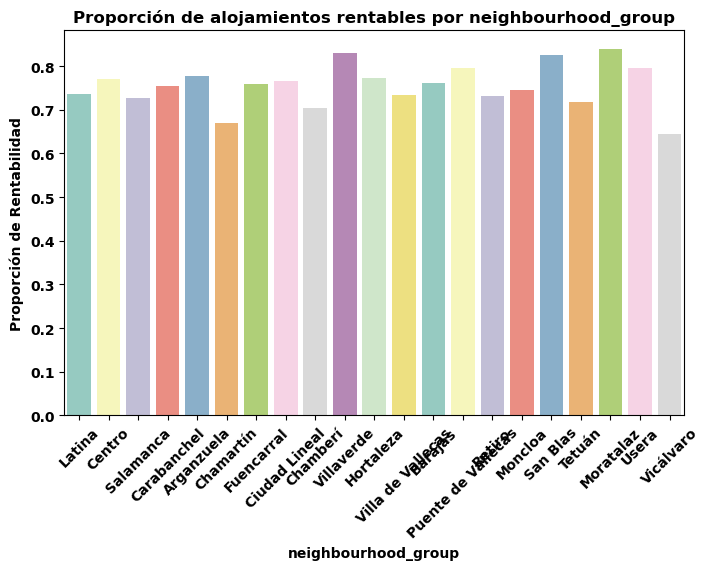

In [4]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

# Asegúrate de que los gráficos se vean en notebooks
%matplotlib inline  

# Lista de variables a graficar
variables = ['price', 'precio_estimado', 'beneficio_neto_anual', 'rentabilidad_anual_pct']

# Tamaño del gráfico
plt.figure(figsize=(16, 12))

# Graficar cada variable con boxplot por neighbourhood_group
for i, var in enumerate(variables, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x='neighbourhood_group', y=var, data=df, palette='Set2')
    plt.title(f'{var} por neighbourhood_group')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Gráfico de proporción de "rentable" por grupo
plt.figure(figsize=(8, 5))
sns.barplot(
    x='neighbourhood_group',
    y='rentable',
    data=df,
    estimator=lambda x: sum(x) / len(x),
    ci=None,
    palette='Set3'
)
plt.ylabel('Proporción de Rentabilidad')
plt.title('Proporción de alojamientos rentables por neighbourhood_group')
plt.xticks(rotation=45)
plt.show()

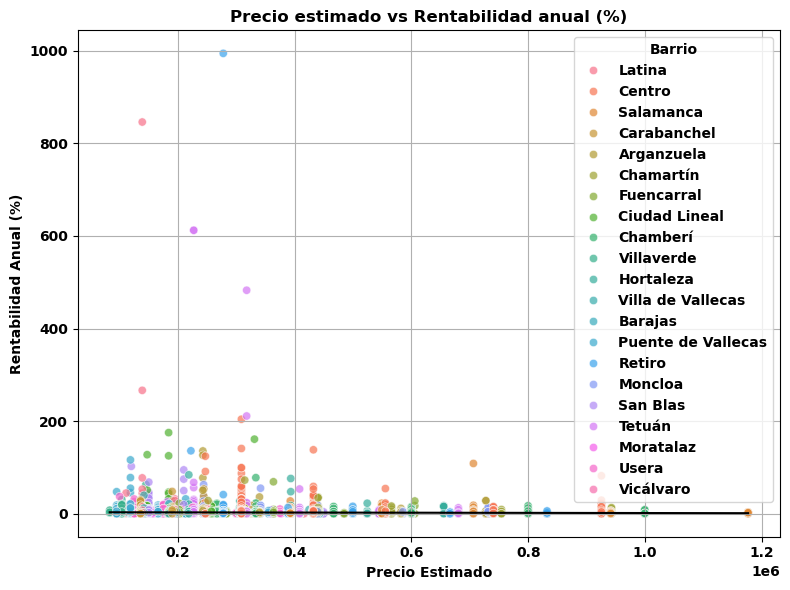

Coeficiente de correlación: -0.02


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot con línea de tendencia
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='precio_estimado', y='rentabilidad_anual_pct', hue='neighbourhood_group', alpha=0.7)
sns.regplot(data=df, x='precio_estimado', y='rentabilidad_anual_pct', scatter=False, color='black', line_kws={"linewidth":1.5})
plt.title('Precio estimado vs Rentabilidad anual (%)')
plt.xlabel('Precio Estimado')
plt.ylabel('Rentabilidad Anual (%)')
plt.legend(title='Barrio')
plt.grid(True)
plt.tight_layout()
plt.show()

# Correlación entre ambas variables
correlacion = df['precio_estimado'].corr(df['rentabilidad_anual_pct'])
print(f'Coeficiente de correlación: {correlacion:.2f}')

In [6]:
top_10 = df[['neighbourhood_group', 'price', 'precio_estimado', 'beneficio_neto_anual', 'rentabilidad_anual_pct']].sort_values(by='rentabilidad_anual_pct', ascending=False).head(50)
top_10

,neighbourhood_group,price,precio_estimado,beneficio_neto_anual,rentabilidad_anual_pct
id,,,,,
942610520665563520,Retiro,17999.0,277450,2759246.70,994.50
660139500537852378,Latina,7650.0,138600,1172745.00,846.14
1060272657994681485,Tetuán,9059.0,226800,1388744.70,612.32
1060276046192183071,Tetuán,9059.0,226800,1388744.70,612.32
612030162376917657,Tetuán,9999.0,317520,1532846.70,482.76
28299366,Latina,9090.0,138600,369399.13,266.52
1087700981397177073,Tetuán,23124.0,317520,670133.52,211.05
918580151552814707,Centro,6517.0,308500,629542.20,204.07
34568403,Ciudad Lineal,2100.0,183800,321930.00,175.15
